# Codecademy [NBA Trends Project](https://www.codecademy.com/projects/practice/nba-trends)

*Analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, you'll analyze data from the NBA (National Basketball Association) and explore possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project we've limited the data to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

You will create several charts and tables in this project, so you'll need to use `plt.clf()` between plots in your code so that the plots don't layer on top of one another.


In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [4]:
# Subset Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


### Task 1
The data has been subset for you into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

Suppose you want to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, create two series named knicks_pts (fran_id = "Knicks") and nets_pts(fran_id = "Nets") that represent the points each team has scored in their games.


In [5]:
# Create series for 2010
knicks10_points = nba_2010.pts[nba.fran_id == "Knicks"]
nets10_points = nba_2010.pts[nba.fran_id == "Nets"]

### Task 2

Calculate the difference between the two teams’ average points scored and save the result as diff_means_2010. Based on this value, do you think fran_id and pts are associated? Why or why not?


In [6]:
diff_means_2010 = knicks10_points.mean() - nets10_points.mean()
print("The difference between the Knicks' and Nets' average points in 2010 scored is about " + str(round(diff_means_2010, 2)) + " points.")


The difference between the Knicks' and Nets' average points in 2010 scored is about 9.73 points.


The difference between the two variables of `fran_id` and `pts` is not enough evidence that the two are associated. These are only two teams out of the data. However, a high mean difference is a sign that the two variables are associated. We will need to provide more evidence to show that the two variables are associated. 

### Task 3
Rather than comparing means, it’s useful look at the full distribution of values to understand whether a difference in means is meaningful. Create a set of overlapping histograms that can be used to compare the points scored for the Knicks compared to the Nets. Use the series you created in the previous step (1) and the code below to create the plot. Do the distributions appear to be the same?


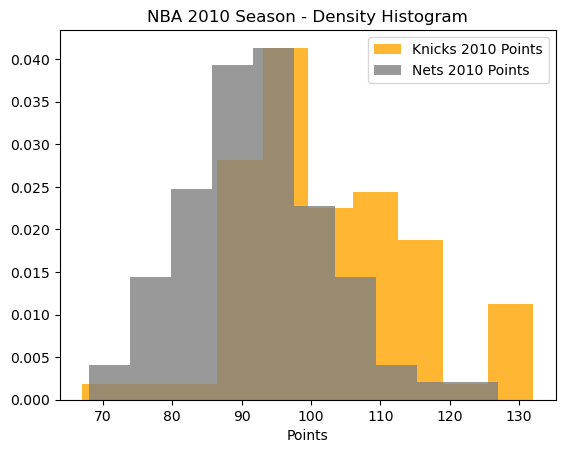

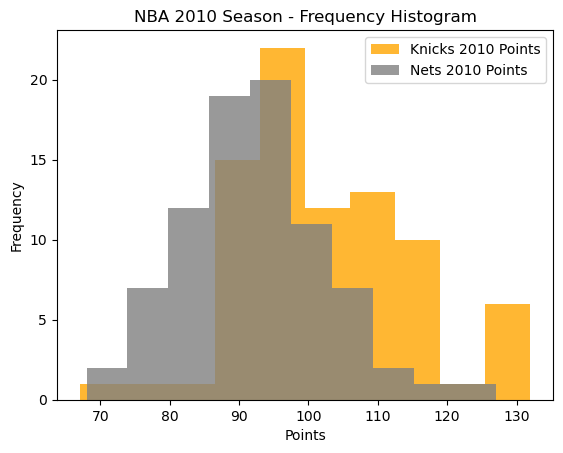

In [7]:
plt.hist(knicks10_points, color = "orange", label = "Knicks 2010 Points", density = True, alpha = 0.8)
plt.hist(nets10_points, color = "gray", label = "Nets 2010 Points", density = True, alpha = 0.8)
plt.xlabel("Points")
plt.title("NBA 2010 Season - Density Histogram")
plt.legend()
plt.show()
plt.close()

plt.hist(knicks10_points, color = "orange", label = "Knicks 2010 Points", alpha = 0.8)
plt.hist(nets10_points, color = "gray", label = "Nets 2010 Points", alpha = 0.8)
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("NBA 2010 Season - Frequency Histogram")
plt.legend()
plt.show()
plt.close()

The histograms above show that there is some overlap, about 50%, between the Knicks and Nets points. This is more evidence leading to the two variables, `fran_id` and `pts`, being associated.

### Task 4
Now, let’s compare the 2010 games to 2014. Replicate the steps from Tasks 2 and 3 using `nba_2014`. First, calculate the mean difference between the two teams points scored. Save and print the value as `diff_means_2014`. Did the difference in points get larger or smaller in 2014? Then, plot the overlapping histograms. Does the mean difference you calculated make sense?


The difference between the Knicks' and Nets' average points in 2014 scored is about 0.45 points.


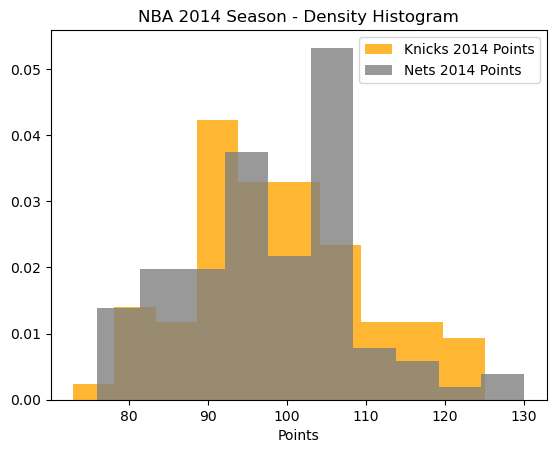

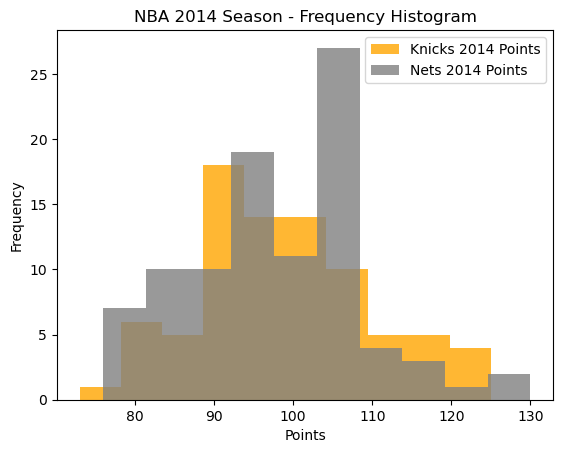

In [8]:
# Create series for 2014
knicks14_points = nba_2014.pts[nba.fran_id == "Knicks"]
nets14_points = nba_2014.pts[nba.fran_id == "Nets"]

# Calculate the difference of means
diff_means_2014 = knicks14_points.mean() - nets14_points.mean()
print("The difference between the Knicks' and Nets' average points in 2014 scored is about " + str(round(diff_means_2014, 2)) + " points.")

# Create histograms
plt.hist(knicks14_points, color = "orange", label = "Knicks 2014 Points", density = True, alpha = 0.8)
plt.hist(nets14_points, color = "gray", label = "Nets 2014 Points", density = True, alpha = 0.8)
plt.xlabel("Points")
plt.title("NBA 2014 Season - Density Histogram")
plt.legend()
plt.show()
plt.close()

plt.hist(knicks14_points, color = "orange", label = "Knicks 2014 Points", alpha = 0.8)
plt.hist(nets14_points, color = "gray", label = "Nets 2014 Points", alpha = 0.8)
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.title("NBA 2014 Season - Frequency Histogram")
plt.legend()
plt.show()
plt.close()

The mean difference between the Knicks and Nets is significantly less in 2014. This low difference shows that `fran_id` and `pts` are weakly associated. The histograms above also show a weak association because the histograms are overlapping a lot. This is evidence showing that `fran_id` and `pts` are not associated. 

### Task 5
For the remainder of this project, we’ll focus on data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, generate side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?


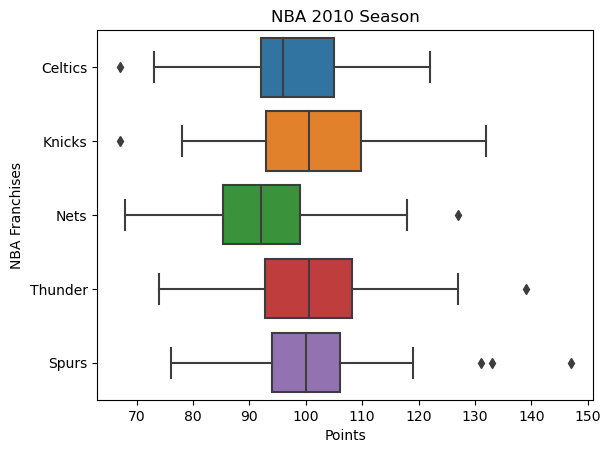

In [9]:
# Create boxplots
sns.boxplot(data = nba_2010, x = "pts", y = "fran_id")
plt.title("NBA 2010 Season")
plt.xlabel("Points")
plt.ylabel("NBA Franchises")
plt.show()
plt.close()

It looks like the majority of NBA Franchises are not associated with other teams because the average points and the boxplots for the franchises hover around ~100 points. However, the Nets seems to break this rule because they average around ~90 points. 

For the majority of cases, `fran_id` and `pts` seem to not be associated with one another, but the Nets seems to show some association.

### Task 6
We'd like to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

Data scientists will often calculate a contingency table of frequencies to help them determine if categorical variables are associated. Calculate a table of frequencies that shows the counts of game_result and game_location.

Save your result as `location_result_freq` and print your result. Based on this table, do you think the variables are associated?`


In [10]:
# Create contingency table of frequencies
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_result_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


In order to assess whether there is an association between `game_result` and `game_location`, we will need to determine whether the information about one variable gives us information about the other.

For example, we see that `Away Games` present the most `Losses` (133), and we see that `Home Games` present the most `Wins` (120).

### Task 7

Convert this table of frequencies to a table of proportions and save the result as `location_result_proportions`.

In [16]:
# Create contingency table of proportions
location_result_proportions = location_result_freq / len(nba_2010)
print(round(location_result_proportions, 3))

game_location      A      H
game_result                
L              0.296  0.233
W              0.204  0.267


Here, we see that two the largest proportions are in the `Away` + `Loss` (0.296) and `Home` + `Win` (0.267) cells of the contingency table.

### Task 8
Using the contingency table created above (Task 6), calculate the expected contingency table (if there were no association) and the Chi-Square statistic.

Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?


In [21]:
# Create the expected contingency tables
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print("The Expected Contingency Table:")
print(expected)
print("")
print("The Observed Contingency Table:")
print(round(location_result_proportions, 3))
print("")
print("Chi-Square statistic: " + str(round(chi2, 3)))

The Expected Contingency Table:
[[119. 119.]
 [106. 106.]]

The Observed Contingency Table:
game_location      A      H
game_result                
L              0.296  0.233
W              0.204  0.267

Chi-Square statistic: 6.502


*For a 2x2 table, Chi-squared greater than about 4 indicates an association. We have exceeded the threshold!*

### Task 9

For each game, 538 has calculated the probability that each team will win the game. We want to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, calculate the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset. Save and print your result. Looking at the matrix, what is the covariance between these two variables?


In [27]:
# Calculate the covariance matrix
cov_matrix_forecast_point_diff = np.cov(nba_2010.forecast, nba_2010.point_diff)
print("The Covariance Matrix: ")
print(cov_matrix_forecast_point_diff)
cov_forecast_point_diff = 1.37
print("The Covariance between `forecast` and `point_diff` is " + str(cov_forecast_point_diff))

The Covariance Matrix: 
[[  0.05   1.37]
 [  1.37 186.56]]
The Covariance between `forecast` and `point_diff` is 1.37


### Task 10

Because 538’s forecast variable is reported as a probability (not a binary), we can calculate the strength of the correlation.

Using nba_2010, calculate the correlation between `forecast` and `point_diff`. Call this `point_diff_forecast_corr`. Save and print your result. Does this value suggest an association between the two variables?


In [33]:
corr_forecast_point_diff, p = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print("The Correlation between `forecast` and `point_diff` is " + str(round(corr_forecast_point_diff, 3)))

The Correlation between `forecast` and `point_diff` is 0.44


Generally, a correlation larger than 0.3 indicates a linear association, and a correlation larger than 0.6 suggests a strong linear association. Therefore, our correlation of `0.44` shows that there is a linear association between `forecast` and `point_diff`.

### Task 11

Generate a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). Does the correlation value make sense?

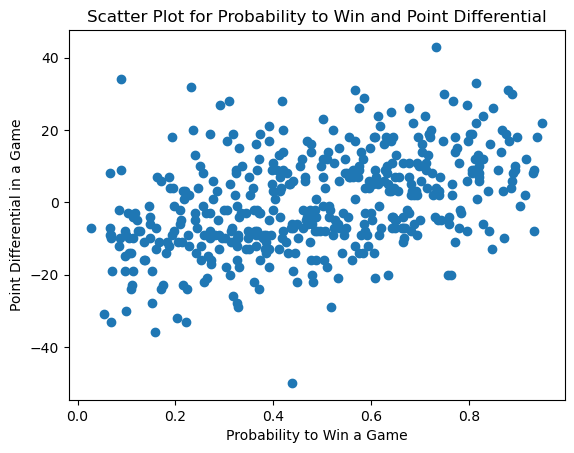

In [34]:
# Create a scatter plt
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff)
plt.title("Scatter Plot for Probability to Win and Point Differential")
plt.xlabel("Probability to Win a Game")
plt.ylabel("Point Differential in a Game")
plt.show()
plt.close()